In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv")
pima.columns = col_names

In [17]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [18]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
#Exactitud
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7489177489177489


In [24]:
#Matriz De Confusion
print(metrics.confusion_matrix(y_test,y_pred))

[[120  26]
 [ 32  53]]


In [27]:
#Sensiblidad 
print(metrics.recall_score(y_test,y_pred))

0.6235294117647059


In [28]:
#Precision 
print(metrics.precision_score(y_test,y_pred))

0.6708860759493671


In [29]:
#Este reporte contiene todos los parametros con que dispone la libreria scikit learn para tareas de clasificacion
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81       146
           1       0.67      0.62      0.65        85

   micro avg       0.75      0.75      0.75       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



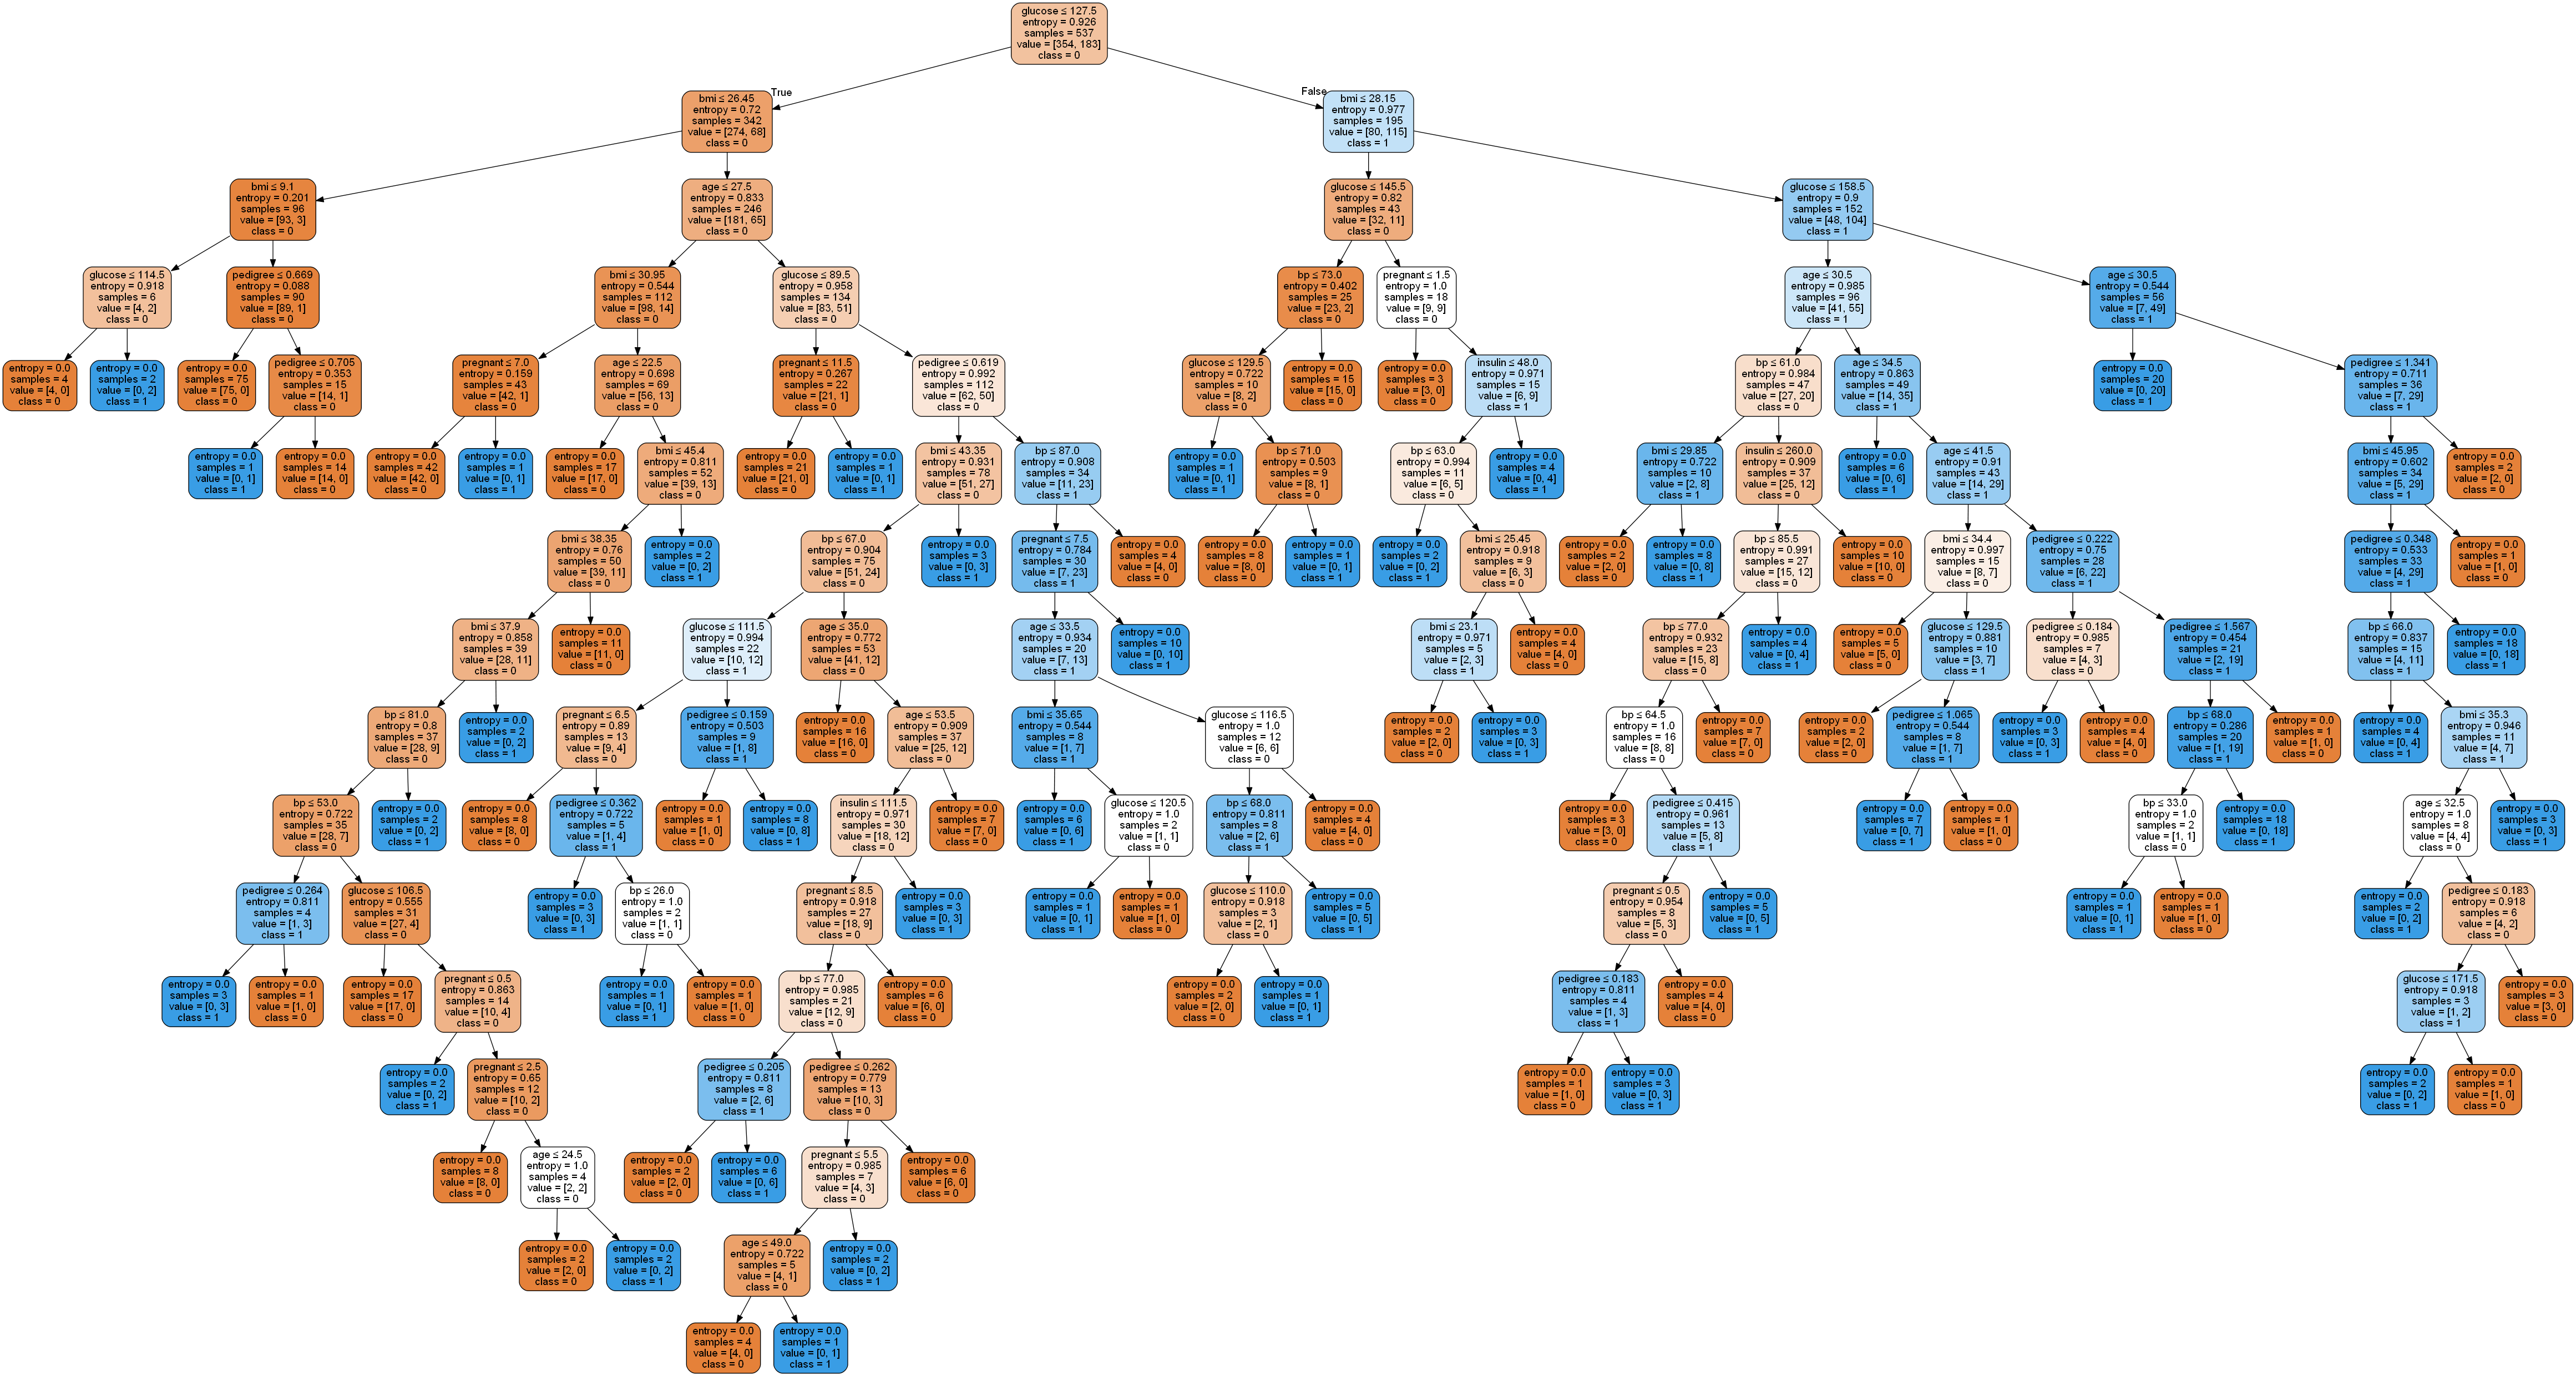

In [21]:
#Convertimos el modelo del arbol en una imagen que se puede desplegar dentro de Jupyter Notebook
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())